In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import time
import strftime

ModuleNotFoundError: No module named 'strftime'

In [49]:
# Reading the data
data=pd.read_csv('Data.csv')
data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [52]:
# it will tell how many rows and columns we have.
data.shape

(110527, 14)

In [6]:
# to know all information about the data, is there, null value, or missing value-we can see.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [54]:
 # modify the data and time into standard form
data['ScheduledDay']=pd.to_datetime(data['ScheduledDay']).dt.date.astype('datetime64[ns]')
data['AppointmentDay']=pd.to_datetime(data['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [8]:
data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [55]:
data['Sch_weekday']=data['ScheduledDay'].dt.dayofweek

data['Sch_weekday'].value_counts()

1    26168
2    24262
0    23085
4    18915
3    18073
5       24
Name: Sch_weekday, dtype: int64

In [50]:
data['app_weekday']=data['AppointmentDay'].dt.dayofweek

data['app_weekday'].value_counts()

AttributeError: Can only use .dt accessor with datetimelike values

In [56]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'Sch_weekday'],
      dtype='object')

In [57]:
# changing the name of some columns
data=data.rename(columns={'Hipertension':'Hypertension','Handcap':'Handicap','SMS_received':'SMSReceived','No-show':'NoShow'})

In [58]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMSReceived', 'NoShow',
       'Sch_weekday'],
      dtype='object')

In [59]:
# dropping some columns which have no significance
data.drop(['PatientId','AppointmentID','Neighbourhood'],axis=1,inplace=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Scholarship     110527 non-null  int64         
 5   Hypertension    110527 non-null  int64         
 6   Diabetes        110527 non-null  int64         
 7   Alcoholism      110527 non-null  int64         
 8   Handicap        110527 non-null  int64         
 9   SMSReceived     110527 non-null  int64         
 10  NoShow          110527 non-null  object        
 11  Sch_weekday     110527 non-null  int64         
 12  app_weekday     110527 non-null  int64         
dtypes: datetime64[ns](2), int64(9), object(2)
memory usage: 11.0+ MB


In [60]:
data.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Sch_weekday
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,1.851955
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,1.378520
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000


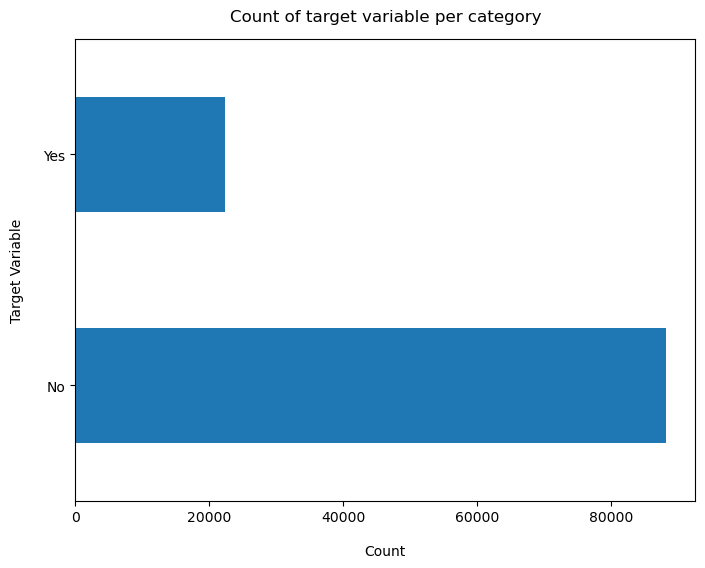

In [61]:
data['NoShow'].value_counts().plot(kind='barh',figsize=(8, 6))
plt.xlabel("Count",labelpad=14)
plt.ylabel("Target Variable",labelpad=14)
plt.title("Count of target variable per category",y=1.02);

In [62]:
# Calculating the % of appointment or not
100*data['NoShow'].value_counts()

No     8820800
Yes    2231900
Name: NoShow, dtype: int64

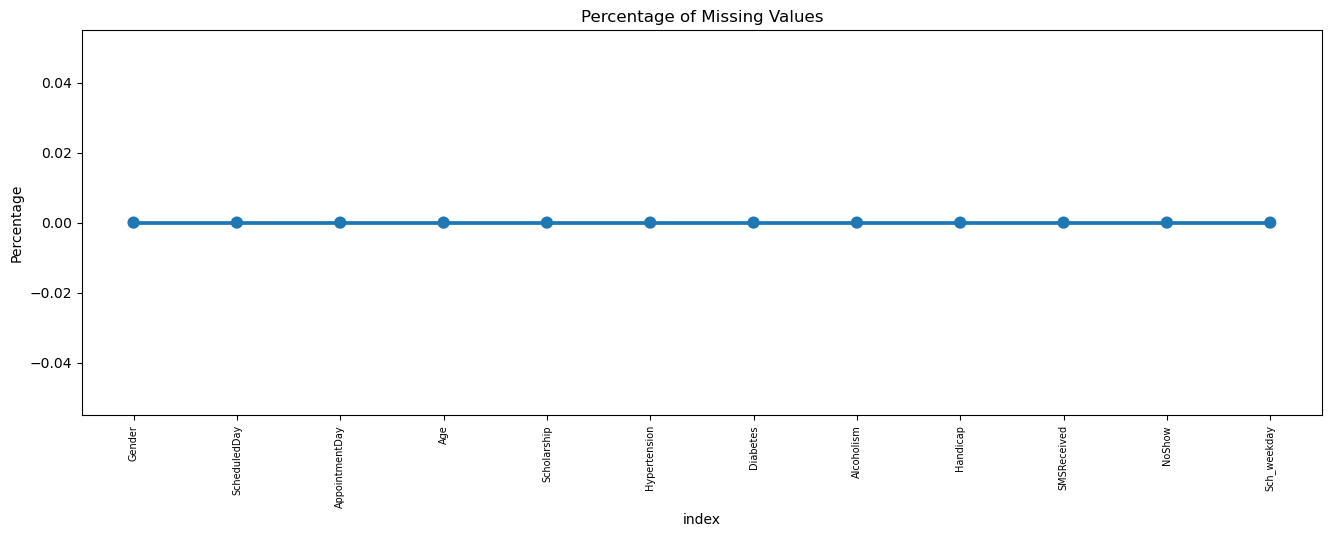

In [63]:
# Having a look that data contains missing values or not
missing=pd.DataFrame(data.isnull().sum()*100/data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax=sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation=90,fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("Percentage")
plt.show()

## Missing Data -Initial Intuition
 Here , we don't have any missing data.
 
 ## General Thumb Rules:-
 - For the features with less missing values- can use regression to predict the missing value for or fill with the mean of the value present depending on the feature.
 
 - For feature with very high number of missing values- it is better to drop those columns as they give a very less insight on analysis.
 
 - as there is no thumb tool on what criteria do we delete the column with high number of missing values but generally you can delete the columns if you have more than 30 to 40% of missing values

## Dta Cleaning
1. Create a copy of data for manufacturing and processing

In [64]:
new_data=data.copy()
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Scholarship     110527 non-null  int64         
 5   Hypertension    110527 non-null  int64         
 6   Diabetes        110527 non-null  int64         
 7   Alcoholism      110527 non-null  int64         
 8   Handicap        110527 non-null  int64         
 9   SMSReceived     110527 non-null  int64         
 10  NoShow          110527 non-null  object        
 11  Sch_weekday     110527 non-null  int64         
dtypes: datetime64[ns](2), int64(8), object(2)
memory usage: 10.1+ MB


# As we don't have any null record there is no data Cleaning required.

In [65]:
# Get the max tenure 
print(data['Age'].max())

115


In [66]:
# Group the tenure in bins of 12 months
labels=["{0} - {1}".format(i,i+20)for i in range(1,118, 20)] 
data['Age_Group']=pd.cut(data.Age,range(1,130,20), right=False, labels=labels)

In [23]:
data.drop(['Age'],axis=1, inplace=True)

## Data Exploration

In [67]:
list(data.columns)

['Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Age',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMSReceived',
 'NoShow',
 'Sch_weekday',
 'Age_Group']

---------- Gender ----------
F    71840
M    38687
Name: Gender, dtype: int64
---------- ScheduledDay ----------
2016-05-03    4238
2016-05-02    4216
2016-05-16    4120
2016-05-05    4095
2016-05-10    4024
              ... 
2016-04-16       1
2016-01-28       1
2015-11-10       1
2016-03-19       1
2016-03-05       1
Name: ScheduledDay, Length: 111, dtype: int64
---------- AppointmentDay ----------
2016-06-06    4692
2016-05-16    4613
2016-05-09    4520
2016-05-30    4514
2016-06-08    4479
2016-05-11    4474
2016-06-01    4464
2016-06-07    4416
2016-05-12    4394
2016-05-02    4376
2016-05-18    4373
2016-05-17    4372
2016-06-02    4310
2016-05-10    4308
2016-05-31    4279
2016-05-05    4273
2016-05-19    4270
2016-05-03    4256
2016-05-04    4168
2016-06-03    4090
2016-05-24    4009
2016-05-13    3987
2016-05-25    3909
2016-05-06    3879
2016-05-20    3828
2016-04-29    3235
2016-05-14      39
Name: AppointmentDay, dtype: int64
---------- Age ----------
 0      3539
 1      

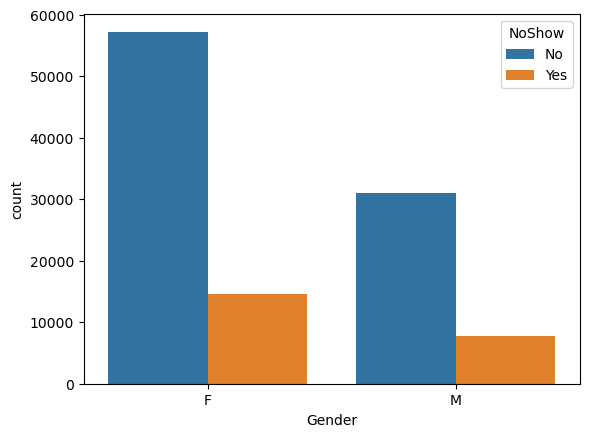

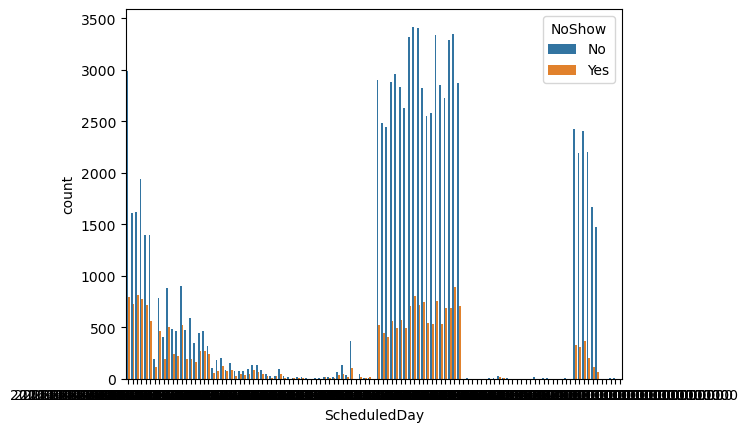

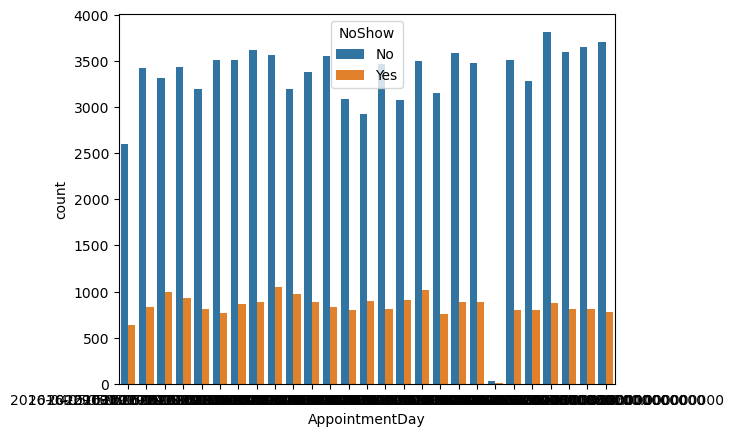

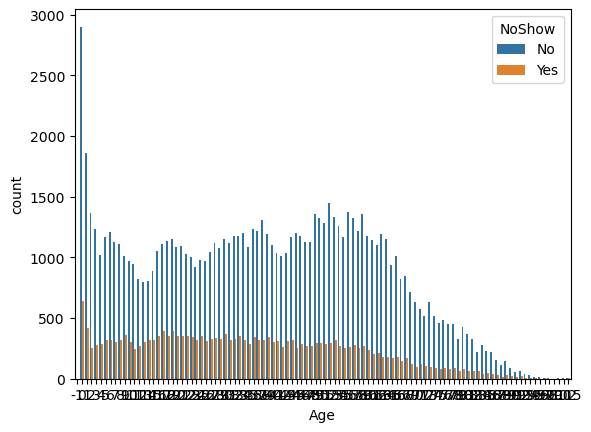

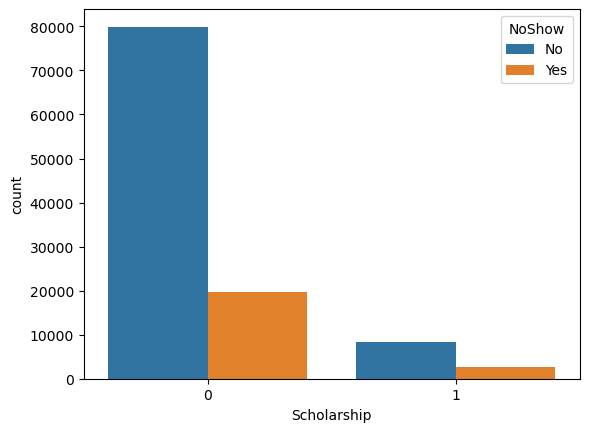

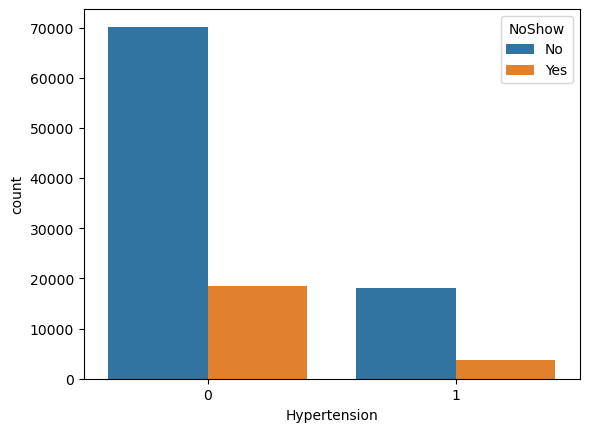

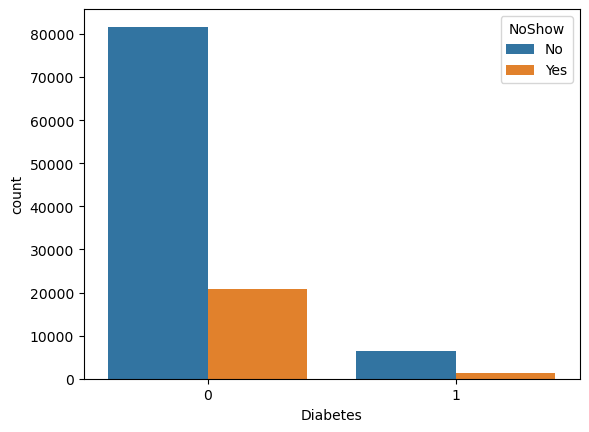

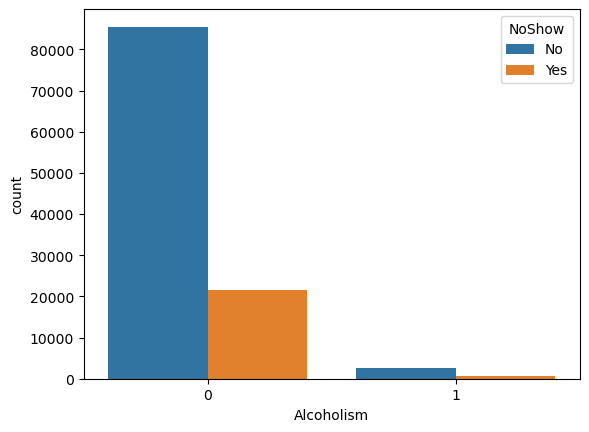

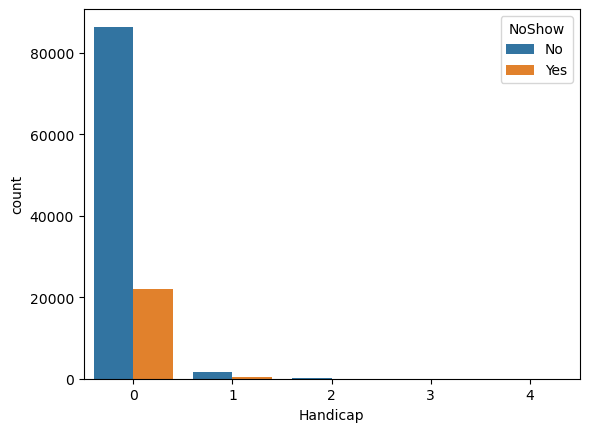

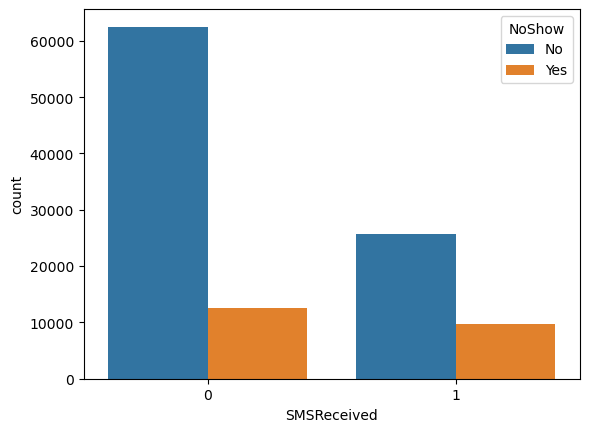

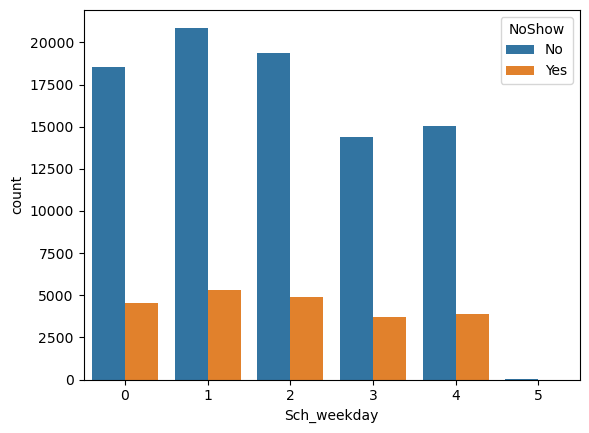

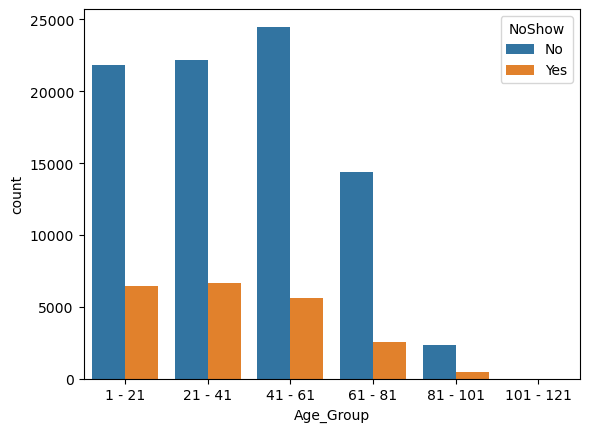

In [68]:
# Having a look into the values of the count of each columns and there count in respect to Noshow column.
for i, predictor in enumerate(data.drop(columns=['NoShow'])):
    print('-'*10, predictor,'-'*10)
    print(data[predictor].value_counts())
    plt.figure(i)
    sns.countplot(data=data, x=predictor, hue='NoShow')

In [69]:
data['NoShow'] = np.where(data.NoShow == 'Yes',1,0)


In [70]:
data.NoShow.value_counts()

0    88208
1    22319
Name: NoShow, dtype: int64

#  Converting all the categorical variables into dummy varibles

In [71]:
dummies_data=pd.get_dummies(data)
dummies_data.head()

,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,Sch_weekday,Gender_F,Gender_M,Age_Group_1 - 21,Age_Group_21 - 41,Age_Group_41 - 61,Age_Group_61 - 81,Age_Group_81 - 101,Age_Group_101 - 121
0,2016-04-29,2016-04-29,62,0,1,0,0,0,0,0,4,1,0,0,0,0,1,0,0
1,2016-04-29,2016-04-29,56,0,0,0,0,0,0,0,4,0,1,0,0,1,0,0,0
2,2016-04-29,2016-04-29,62,0,0,0,0,0,0,0,4,1,0,0,0,0,1,0,0
3,2016-04-29,2016-04-29,8,0,0,0,0,0,0,0,4,1,0,1,0,0,0,0,0
4,2016-04-29,2016-04-29,56,0,1,1,0,0,0,0,4,1,0,0,0,1,0,0,0


C:\Users\menik\AppData\Local\Temp\ipykernel_12404\3662624440.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dummies_data.corr()['NoShow'].sort_values(ascending = False).plot(kind='bar')


<Axes: >

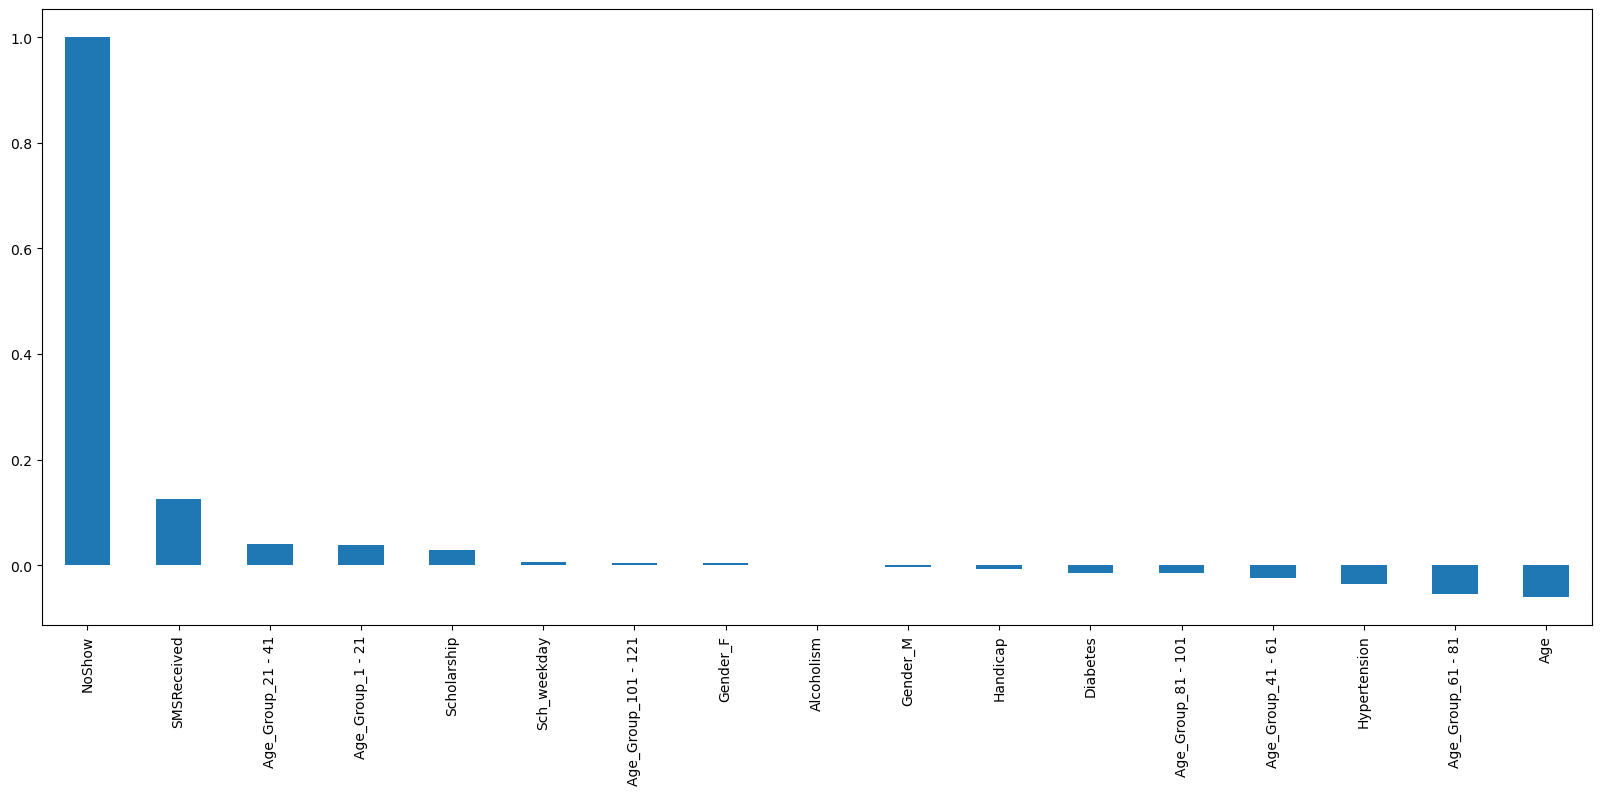

In [72]:
# Building the corelation of all Predictor with NoShow
plt.figure(figsize=(20,8))
dummies_data.corr()['NoShow'].sort_values(ascending = False).plot(kind='bar')


C:\Users\menik\AppData\Local\Temp\ipykernel_12404\133197985.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dummies_data.corr(), cmap='Paired')


<Axes: >

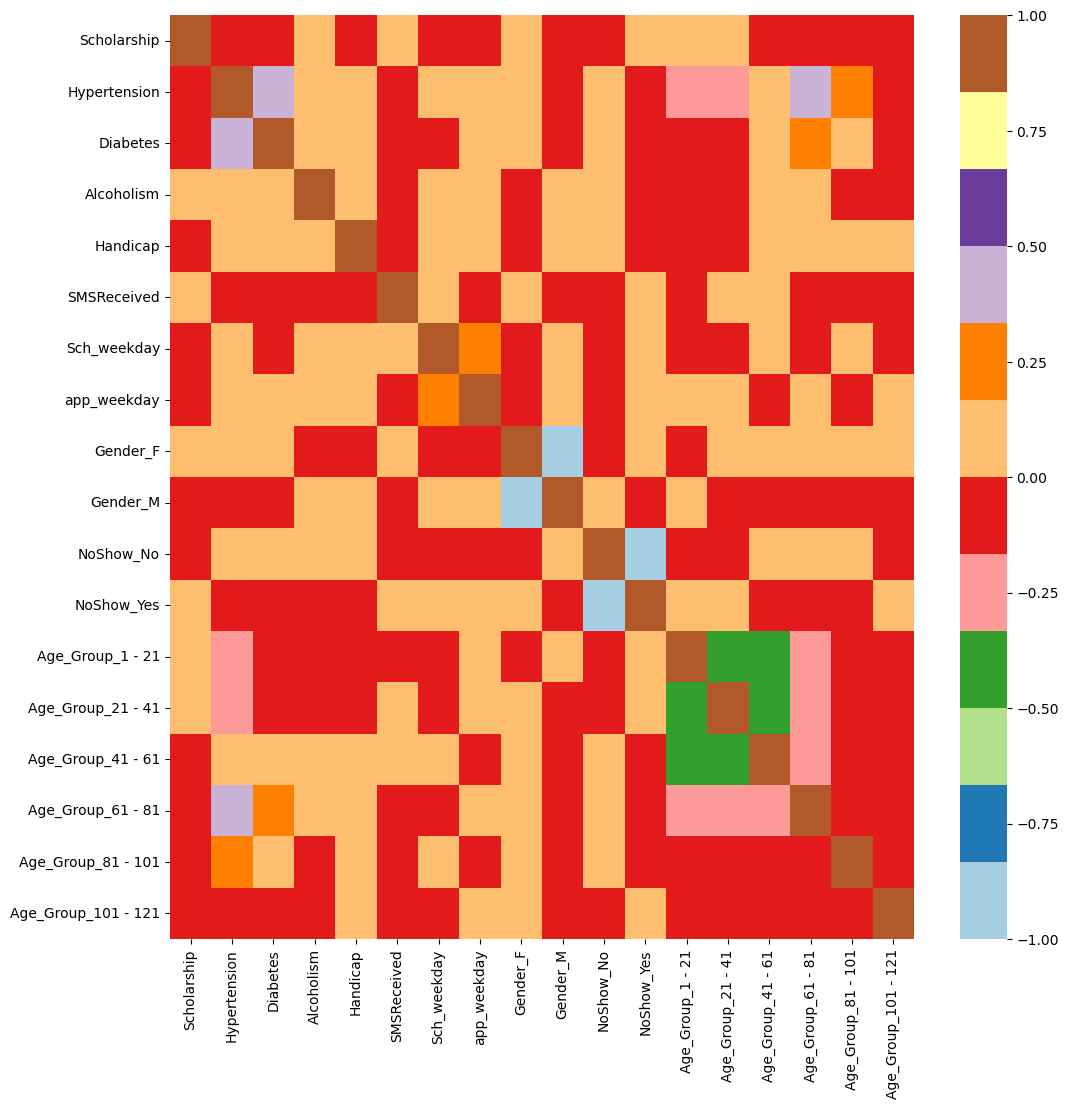

In [30]:
plt.figure(figsize=(12,12))
sns.heatmap(dummies_data.corr(), cmap='Paired')

In [ ]:
## Bivariente Analysis

In [73]:
new_df1_target0=data.loc[data['NoShow']==0]
new_df1_target1=data.loc[data['NoShow']==1]

In [75]:
def uniplot(df, col, title, hue=None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams["axes.titlesize"] = 24
    plt.rcParams["axes.titlepad"] = 30

    temp = pd.Series(data=hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4 * len(temp.unique())
    fig.set_size_inches(width, 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=hue, palette='bright')

    plt.show()


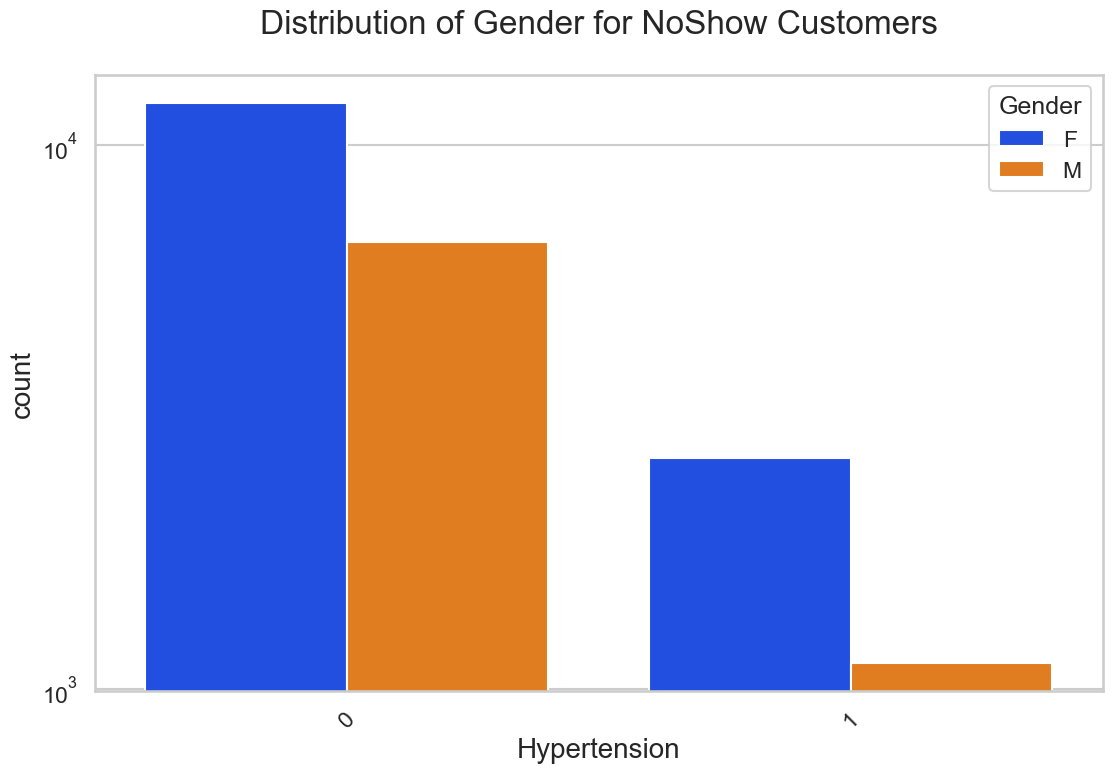

In [76]:
uniplot(new_df1_target1,col='Hypertension',title='Distribution of Gender for NoShow Customers',hue='Gender')


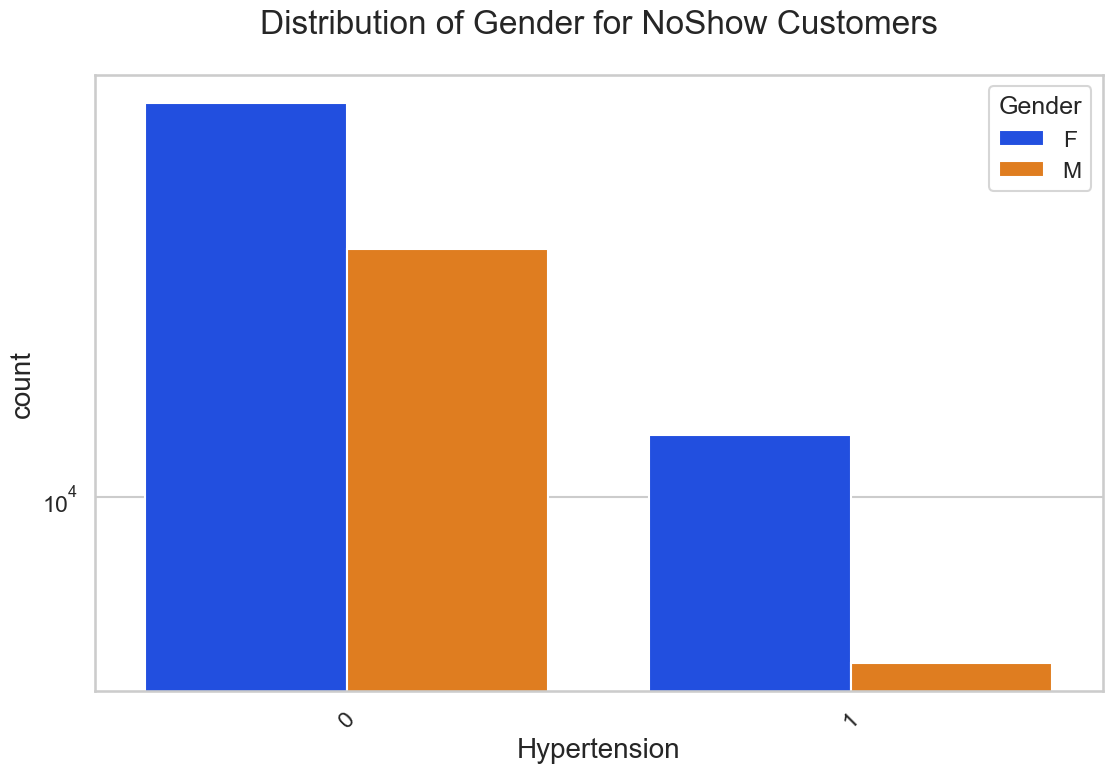

In [77]:
uniplot(new_df1_target0,col='Hypertension',title='Distribution of Gender for NoShow Customers',hue='Gender')


KeyError: 'Age_group'

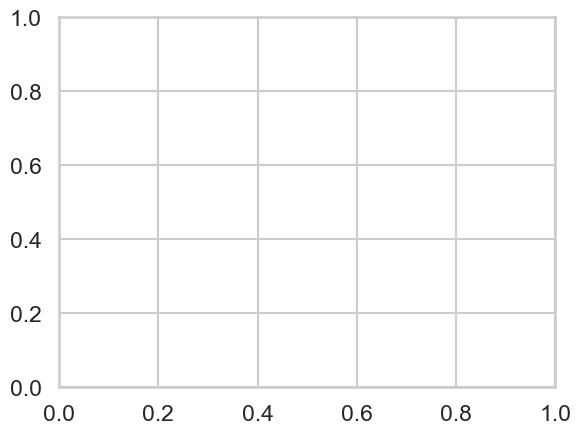

In [80]:
uniplot(new_df1_target1, col='Age_group', title='Distribution of Age for NoShow Customers', hue='Gender')


Findings
female patient have taken more appointment than male Patient.

Ratio of NoShow and Show is almost equal for a group accept zero and age one with 80% so rate for each age group.

Each neighbourhood has almost 80% show rate.

There are 9966 Patients without scholarship and out of them around 80% have come from the visit and out of 21801 patients with scholarship around twenty five percent of them have come for the visit.

there are around 88,726 patients without hypertension and out of them around 78% have come for the visit and out of 21801 patients with hypertension around 85% of them have come for the visit.

There are around 102584 patients without diabetes and out of around 80% have come from the visit and out of 7943 patients with diabetes around 83% of them have come for visit.

There are around75045 patients who have not received a SMS and out of 35482 them around 84% have come for visit and out of it the who have received sms around page 72% of the have come for the visit.

there is a new appointment on Sunday and Saturday appointments are being released in comparison to other Weekday days.